In [65]:
import numpy as np
import pydft2kp as dft2kp
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [2]:
%%capture
# avoid unecessary output from the irrep package

#################################
# DATA FOR GaN
#################################

# step 1: read DFT data
kpSOC = dft2kp.irrep(dftdir='../GaN',
                     outdir='outdir',
                     prefix='GaN',
                     kpt=31,           
                     kname='GM')
# step 2: read or calculate matrix elements of p
kpSOC.get_p_matrices(qekp='kp.dat')

# step 1: again, but without psoc
kpNOSOC = dft2kp.irrep(dftdir='../GaN',
                       outdir='outdir',
                       prefix='GaN',
                       kpt=31,           
                       kname='GM')
# step 2: read without psoc
kpNOSOC.get_p_matrices()


# step 3: define the set alpha
#         applies fold down via Löwdin
setA = np.arange(30, 40)
kpSOC.define_set_A(setA)
kpNOSOC.define_set_A(setA)

# kpath as run in the bands calculation of QE
kpath = [[    30,          30,      1],
         [R'$A$', R'$\Gamma$', R'$M$']]

# init plotter
bands = dft2kp.qe_plotter(kpSOC, 'bands.gnu', kpath)

# build crude models
HSOC = kpSOC.build_H_of_k(all_bands=False)
HNOSOC = kpNOSOC.build_H_of_k(all_bands=False)
# calculate energies
ESOC = np.array([np.linalg.eigvalsh(HSOC(*kvec)) for kvec in bands.k3D])
ENOSOC = np.array([np.linalg.eigvalsh(HNOSOC(*kvec)) for kvec in bands.k3D])

In [10]:
%%capture
# avoid unecessary output from the irrep package

#################################
# DATA FOR GaP
#################################

# step 1: read DFT data
kpSOC = dft2kp.irrep(dftdir='../GaP',
                     outdir='outdir',
                     prefix='GaP',
                     kpt=31,           
                     kname='GM')
# step 2: read or calculate matrix elements of p
kpSOC.get_p_matrices(qekp='kp.dat')

# step 1: again, but without psoc
kpNOSOC = dft2kp.irrep(dftdir='../GaP',
                       outdir='outdir',
                       prefix='GaP',
                       kpt=31,           
                       kname='GM')
# step 2: read without psoc
kpNOSOC.get_p_matrices()


# step 3: define the set alpha
#         applies fold down via Löwdin
setA = np.arange(30, 40)
kpSOC.define_set_A(setA)
kpNOSOC.define_set_A(setA)

# kpath as run in the bands calculation of QE
kpath = [[    30,          30,      1],
         [R'$A$', R'$\Gamma$', R'$M$']]

# init plotter
bands2 = dft2kp.qe_plotter(kpSOC, 'bands.gnu', kpath)

# build crude models
HSOC = kpSOC.build_H_of_k(all_bands=False)
HNOSOC = kpNOSOC.build_H_of_k(all_bands=False)
# calculate energies
ESOC2 = np.array([np.linalg.eigvalsh(HSOC(*kvec)) for kvec in bands2.k3D])
ENOSOC2 = np.array([np.linalg.eigvalsh(HNOSOC(*kvec)) for kvec in bands2.k3D])

/tmp/ipykernel_71219/2877436768.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels)


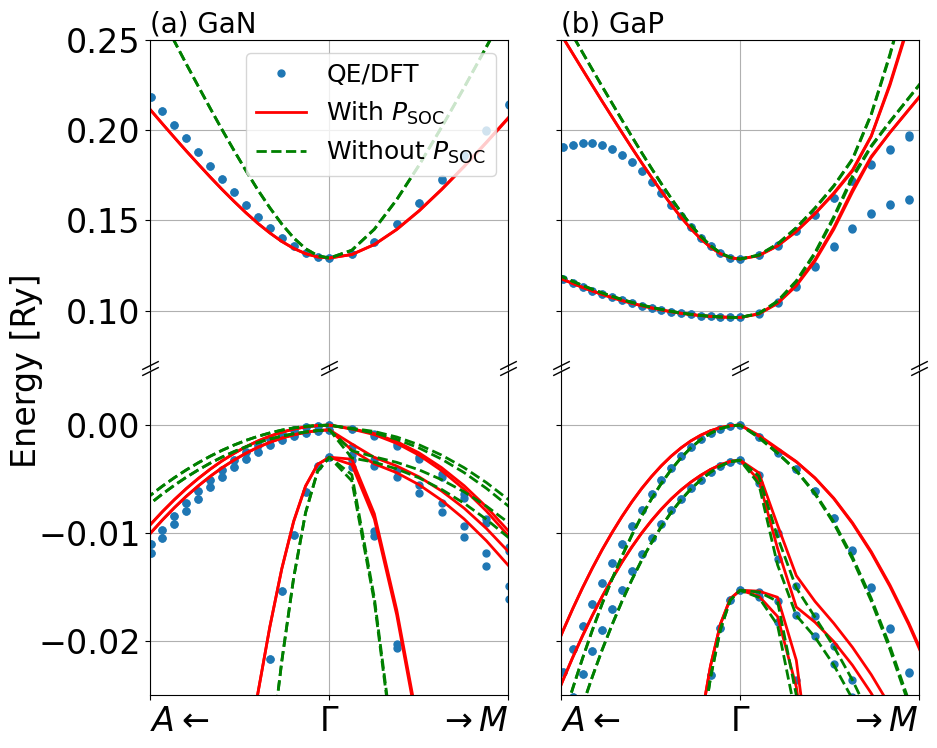

In [76]:
plt.figure(figsize=(10,8))

######################
# GaN
######################
plt.subplot(221)
plt.title(r'(a) GaN', loc='left', fontsize=20)
pdft   = plt.plot(bands.kdist, bands.bands, 'o', c='C0', ms=5) 
psoc   = plt.plot(bands.kdist, ESOC  , c='red', lw=2)
pnosoc = plt.plot(bands.kdist, ENOSOC, c='green', lw=2, ls='--')
# set legends for single lines
pdft[0].set_label('QE/DFT')
psoc[0].set_label(r'With $P_{\rm SOC}$')
pnosoc[0].set_label(r'Without $P_{\rm SOC}$')
plt.legend(fontsize=18)
bands.set_labels_and_limits(ax=plt.gca(), ymin=0.07, ymax=0.25, xmin=-3*dft2kp.a0, xmax=3*dft2kp.a0)
plt.ylabel('')
# hide the spines between ax and ax2
ax1 = plt.gca()
ax1.spines.bottom.set_visible(False)
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax1.set_xticklabels(labels=[])
#
plt.grid()
######################
plt.subplot(223)
pdft   = plt.plot(bands.kdist, bands.bands, 'o', c='C0', ms=5) 
psoc   = plt.plot(bands.kdist, ESOC  , c='red', lw=2)
pnosoc = plt.plot(bands.kdist, ENOSOC, c='green', lw=2, ls='--')
# set legends for single lines
# pdft[0].set_label('QE/DFT')
psoc[0].set_label(r'With $P_{\rm SOC}$')
pnosoc[0].set_label(r'Without $P_{\rm SOC}$')
# plt.legend(fontsize=12)
bands2.set_labels_and_limits(ax=plt.gca(), ymin=-0.025, ymax=0.005, xmin=-3*dft2kp.a0, xmax=3*dft2kp.a0)
# hide the spines between ax and ax2
ax2 = plt.gca()
ax2.spines.top.set_visible(False)
ax2.xaxis.tick_bottom()
plt.grid()

# Now, let's turn towards the cut-out slanted lines.
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1, 0.5], [0, 0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1, 0.5], [1, 1, 1], transform=ax2.transAxes, **kwargs)

######################
# GaP
######################
plt.subplot(222)
plt.title(r'(b) GaP', loc='left', fontsize=20)
pdft   = plt.plot(bands2.kdist, bands2.bands, 'o', c='C0', ms=5) 
psoc   = plt.plot(bands2.kdist, ESOC2  , c='red', lw=2)
pnosoc = plt.plot(bands2.kdist, ENOSOC2, c='green', lw=2, ls='--')
# set legends for single lines
# pdft[0].set_label('QE/DFT')
psoc[0].set_label(r'With $P_{\rm SOC}$')
pnosoc[0].set_label(r'Without $P_{\rm SOC}$')
# plt.legend(fontsize=12)
bands2.set_labels_and_limits(ax=plt.gca(), ymin=0.07, ymax=0.25, xmin=-3*dft2kp.a0, xmax=3*dft2kp.a0)
plt.ylabel('')
# hide the spines between ax and ax2
ax3 = plt.gca()
ax3.spines.bottom.set_visible(False)
ax3.tick_params(labeltop=False)  # don't put tick labels at the top
ax3.set_xticklabels(labels=[])
ax3.set_yticklabels(labels=[])
#
plt.grid()
######################
plt.subplot(224)
pdft   = plt.plot(bands2.kdist, bands2.bands, 'o', c='C0', ms=5) 
psoc   = plt.plot(bands2.kdist, ESOC2  , c='red', lw=2)
pnosoc = plt.plot(bands2.kdist, ENOSOC2, c='green', lw=2, ls='--')
# set legends for single lines
# pdft[0].set_label('QE/DFT')
psoc[0].set_label(r'With $P_{\rm SOC}$')
pnosoc[0].set_label(r'Without $P_{\rm SOC}$')
# plt.legend(fontsize=12)
bands2.set_labels_and_limits(ax=plt.gca(), ymin=-0.025, ymax=0.005, xmin=-3*dft2kp.a0, xmax=3*dft2kp.a0)
plt.ylabel('')
# hide the spines between ax and ax2
ax4 = plt.gca()
ax4.spines.top.set_visible(False)
ax4.xaxis.tick_bottom()
ax4.set_yticklabels(labels=[])
plt.grid()

# Now, let's turn towards the cut-out slanted lines.
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax3.plot([0, 1, 0.5], [0, 0, 0], transform=ax3.transAxes, **kwargs)
ax4.plot([0, 1, 0.5], [1, 1, 1], transform=ax4.transAxes, **kwargs)

plt.tight_layout()
plt.subplots_adjust(hspace=0.02)
# remove top tick label of ax2
labels = ax2.get_yticklabels()
labels[-1].set_text('')
ax2.set_yticklabels(labels)

ax2.yaxis.set_label_coords(-0.3, 1)

plt.savefig('GaN-GaP-Psoc.svg')
plt.savefig('GaN-GaP-Psoc.png')
plt.show()